# 1- importation des données 

In [4]:
#importation des bibliothèques necessaires
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, confusion_matrix, auc
%matplotlib inline


In [5]:
#importation des données
data1 = pd.read_csv('Churn.csv')

#  2- compréhension de données 

In [6]:
#afficher les premiers données 
print(data1.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [7]:
data1.drop(["customerID"],axis=1,inplace = True)


In [8]:
data1.shape

(7043, 20)

# 3- Data cleaning

In [9]:
#Remplacez les colonnes de texte par des entiers.
#Les colonnes ci-dessous incluent des valeurs de texte similaires, je les ai donc modifiées une fois.

data1.gender = [1 if each == "Male" else 0 for each in data1.gender]

columns_to_convert = ['Partner', 
                      'Dependents', 
                      'OnlineSecurity',
                      'OnlineBackup',
                      'DeviceProtection',
                      'TechSupport',
                      'StreamingTV',
                      'StreamingMovies',
                      'PaperlessBilling', 
                      'Churn']

for item in columns_to_convert:
    data1[item] = [1 if each == "Yes" else 0 if each == "No" else -1 for each in data1[item]]
    
data1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,No,No phone service,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,Yes,No,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,1,0,0,0,2,Yes,No,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,No,No phone service,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,Yes,No,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [10]:
data1["InternetService"].replace(["Fiber optic","DSL","No"],[0,1,2],inplace= True)

In [11]:
#CONTARCT
data1["Contract"].replace(["Month-to-month","Two year","One year"],[0,1,2],inplace = True)

In [12]:
data1["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [13]:
#PAYMENT METHOD
data1["PaymentMethod"].replace(["Electronic check","Mailed check","Bank transfer (automatic)","Credit card (automatic)"],[0,1,2,3],inplace =True)

In [14]:
pd.to_numeric(data1['MonthlyCharges'])


0        29.85
1        56.95
2        53.85
3        42.30
4        70.70
         ...  
7038     84.80
7039    103.20
7040     29.60
7041     74.40
7042    105.65
Name: MonthlyCharges, Length: 7043, dtype: float64

In [15]:
data1['TotalCharges'] = data1['TotalCharges'].replace([' '],'0')

In [16]:
#la valeur 489eme de la colonne TotalCharges et un espace qui ne peut pas etre transformer en une valeur numerique, on le remplace par la 0

In [17]:
pd.to_numeric(data1['TotalCharges'])


0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [18]:
data1["PhoneService"].replace(["No","Yes"],[1,2],inplace = True)

In [19]:
data1["MultipleLines"].replace(["No","Yes","No phone service"],[0,1,2],inplace = True)

In [20]:
data1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,1,2,1,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,1,0,0,0,34,2,0,1,1,0,1,0,0,0,2,0,1,56.95,1889.5,0
2,1,0,0,0,2,2,0,1,1,1,0,0,0,0,0,1,1,53.85,108.15,1
3,1,0,0,0,45,1,2,1,1,0,1,1,0,0,2,0,2,42.30,1840.75,0
4,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,1,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,2,1,1,1,0,1,1,1,1,2,1,1,84.80,1990.5,0
7039,0,0,1,1,72,2,1,0,0,1,1,0,1,1,2,1,3,103.20,7362.9,0
7040,0,0,1,1,11,1,2,1,1,0,0,0,0,0,0,1,0,29.60,346.45,0
7041,1,1,1,0,4,2,1,0,0,0,0,0,0,0,0,1,1,74.40,306.6,1


In [21]:
data1.shape

(7043, 20)

In [22]:
data1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,1,2,1,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,1,0,0,0,34,2,0,1,1,0,1,0,0,0,2,0,1,56.95,1889.5,0
2,1,0,0,0,2,2,0,1,1,1,0,0,0,0,0,1,1,53.85,108.15,1
3,1,0,0,0,45,1,2,1,1,0,1,1,0,0,2,0,2,42.30,1840.75,0
4,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,1,0,70.70,151.65,1


In [23]:
X= data1.iloc[:,0:14].values
y= pd.factorize(data1['Churn'])[0]

In [24]:
y

array([0, 0, 1, ..., 0, 1, 0])

In [25]:
data1.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,1,2,1,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,1,0,0,0,34,2,0,1,1,0,1,0,0,0,2,0,1,56.95,1889.5,0
2,1,0,0,0,2,2,0,1,1,1,0,0,0,0,0,1,1,53.85,108.15,1
3,1,0,0,0,45,1,2,1,1,0,1,1,0,0,2,0,2,42.30,1840.75,0
4,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,1,0,70.70,151.65,1


In [26]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [28]:
from mlxtend.feature_selection import SequentialFeatureSelector as SBS
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [31]:
sffsNBACC= SFS(GaussianNB(), 
           k_features=1, 
           forward=True, 
           floating=True, 
           scoring='roc_auc',
           cv=10,
          n_jobs=-1).fit(X_train, y_train)

# 1-Arbre de décision CART:

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc_model = DecisionTreeClassifier().fit(X_train, y_train)
y_pred_dtc = dtc_model.predict(X_test)

In [55]:
dt = DecisionTreeClassifier(random_state=3)

In [56]:
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': np.arange(1,15)}

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
grid = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5)

In [59]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [60]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [61]:
final_model = DecisionTreeClassifier(random_state=0, criterion='gini', max_depth=3 )

In [62]:
final_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [63]:
print('train score = ', final_model.score(X_train, y_train))
print('test_score = ', final_model.score(X_test, y_test))

train score =  0.7845841784989858
test_score =  0.8035967818267865


In [64]:
print('test_score = ', final_model.score(X_test, y_test))

test_score =  0.8035967818267865


ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (7043).

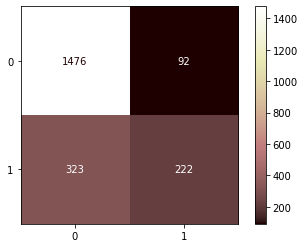

In [65]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(final_model, X_test, y_test,display_labels=data1.Churn,cmap=plt.cm.pink)  
plt.show()

In [66]:
ypred = final_model.predict(X_test)
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88      1568
           1       0.71      0.41      0.52       545

    accuracy                           0.80      2113
   macro avg       0.76      0.67      0.70      2113
weighted avg       0.79      0.80      0.78      2113



[Text(167.4, 190.26, 'tenure <= 0.229\ngini = 0.393\nsamples = 4930\nvalue = [3606, 1324]'),
 Text(83.7, 135.9, 'InternetService <= 0.25\ngini = 0.496\nsamples = 1790\nvalue = [976, 814]'),
 Text(41.85, 81.53999999999999, 'tenure <= 0.021\ngini = 0.443\nsamples = 774\nvalue = [256, 518]'),
 Text(20.925, 27.180000000000007, 'gini = 0.267\nsamples = 164\nvalue = [26, 138]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.47\nsamples = 610\nvalue = [230, 380]'),
 Text(125.55000000000001, 81.53999999999999, 'tenure <= 0.076\ngini = 0.413\nsamples = 1016\nvalue = [720, 296]'),
 Text(104.625, 27.180000000000007, 'gini = 0.476\nsamples = 553\nvalue = [337, 216]'),
 Text(146.475, 27.180000000000007, 'gini = 0.286\nsamples = 463\nvalue = [383, 80]'),
 Text(251.10000000000002, 135.9, 'InternetService <= 0.25\ngini = 0.272\nsamples = 3140\nvalue = [2630, 510]'),
 Text(209.25, 81.53999999999999, 'tenure <= 0.604\ngini = 0.412\nsamples = 1407\nvalue = [999, 408]'),
 Text(188.32500000000002

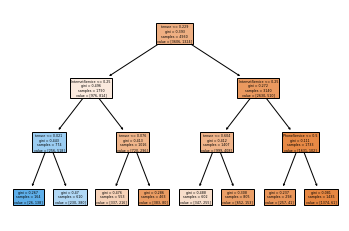

In [67]:
from sklearn.tree import plot_tree
plot_tree(final_model,feature_names = list(data1.columns[:-1]),filled=True)

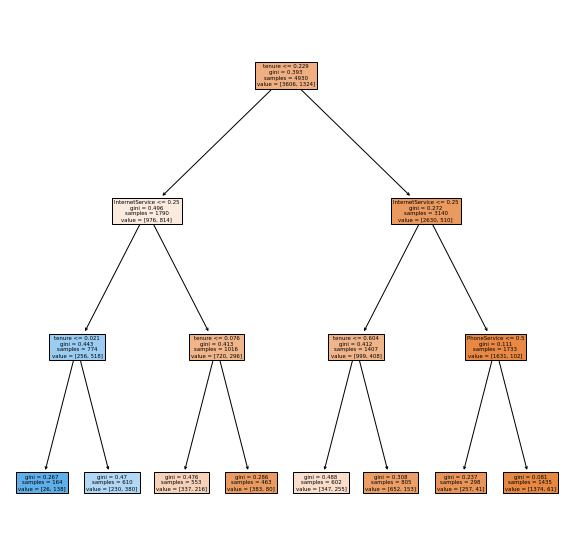

In [68]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plot_tree(final_model,feature_names = list(data1.columns[:-1]),filled=True)
plt.show()

In [69]:
from sklearn.tree import export_text
print(export_text(final_model))

|--- feature_4 <= 0.23
|   |--- feature_7 <= 0.25
|   |   |--- feature_4 <= 0.02
|   |   |   |--- class: 1
|   |   |--- feature_4 >  0.02
|   |   |   |--- class: 1
|   |--- feature_7 >  0.25
|   |   |--- feature_4 <= 0.08
|   |   |   |--- class: 0
|   |   |--- feature_4 >  0.08
|   |   |   |--- class: 0
|--- feature_4 >  0.23
|   |--- feature_7 <= 0.25
|   |   |--- feature_4 <= 0.60
|   |   |   |--- class: 0
|   |   |--- feature_4 >  0.60
|   |   |   |--- class: 0
|   |--- feature_7 >  0.25
|   |   |--- feature_5 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_5 >  0.50
|   |   |   |--- class: 0



# 2-random forest

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  cross_val_score,GridSearchCV

Rfclf = RandomForestClassifier(random_state=15)
Rfclf.fit(X_train, y_train)

RandomForestClassifier(random_state=15)

In [71]:
clf_score = cross_val_score(Rfclf, X_train, y_train, cv=5)
print(clf_score)
clf_score.mean()

[0.7494929  0.78600406 0.77079108 0.76369168 0.76267748]


0.7665314401622718

In [72]:
from sklearn.ensemble import RandomForestClassifier
Rf=RandomForestClassifier(n_estimators=10).fit(X_train, y_train)
y_pred_RF=Rf.predict(X_test)

In [73]:
print("confusion matrix : ")
print(confusion_matrix(y_test, y_pred_RF))  
print(classification_report(y_test, y_pred_RF)) 
print("Accuracy score is : " , accuracy_score(y_test, y_pred_RF))

confusion matrix : 
[[1399  169]
 [ 288  257]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1568
           1       0.60      0.47      0.53       545

    accuracy                           0.78      2113
   macro avg       0.72      0.68      0.69      2113
weighted avg       0.77      0.78      0.77      2113

Accuracy score is :  0.783719829626124


In [74]:
print('train score = ', Rf.score(X_train, y_train))
print('test_score = ', Rf.score(X_test, y_test))

train score =  0.9476673427991886
test_score =  0.783719829626124


# 3-Naive Bayes 

In [75]:
import mpmath
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

In [76]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [77]:
expected = y_test
predicted = model.predict(X_test)

In [78]:
metrics.classification_report(expected, predicted)

'              precision    recall  f1-score   support\n\n           0       0.90      0.73      0.81      1568\n           1       0.50      0.77      0.61       545\n\n    accuracy                           0.74      2113\n   macro avg       0.70      0.75      0.71      2113\nweighted avg       0.80      0.74      0.76      2113\n'

In [79]:
metrics.confusion_matrix(expected, predicted)

array([[1152,  416],
       [ 128,  417]])

In [80]:
print("confusion matrix : ")
print(confusion_matrix(y_test, predicted))  
print(classification_report(y_test, predicted)) 
print("Accuracy score is : " , accuracy_score(y_test, predicted))

confusion matrix : 
[[1152  416]
 [ 128  417]]
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1568
           1       0.50      0.77      0.61       545

    accuracy                           0.74      2113
   macro avg       0.70      0.75      0.71      2113
weighted avg       0.80      0.74      0.76      2113

Accuracy score is :  0.7425461429247515


In [81]:
from sklearn.metrics import accuracy_score

In [82]:
accuracy_score(y_test,predicted)

0.7425461429247515

# 4-KNN

In [83]:
X= data1.iloc[:,0:14].values
y= pd.factorize(data1['Churn'])[0]

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [85]:
from sklearn.neighbors import KNeighborsClassifier



Text(0, 0.5, 'Erreur')

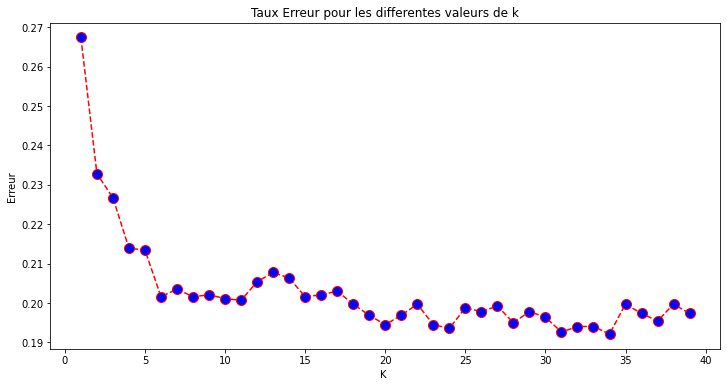

In [86]:
error = []
# Calculer l'erreur pour k entre 1 et 40 
#Pour chaque itération, l'erreur moyenne pour les valeurs prédites 
#de l'ensemble de test est calculée et sauvegardée ds la liste Erreur.
for i in range(1, 40):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')

In [87]:
knn = KNeighborsClassifier(23)
knn_model = knn.fit(X_train, y_train)
y_pred_knn =knn_model.predict(X_test)

In [88]:
print("confusion matrix : ")
print(confusion_matrix(y_test, y_pred_knn))  
print(classification_report(y_test, y_pred_knn)) 
print("Accuracy score is : " , accuracy_score(y_test, y_pred_knn))

confusion matrix : 
[[1448  120]
 [ 291  254]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.88      1568
           1       0.68      0.47      0.55       545

    accuracy                           0.81      2113
   macro avg       0.76      0.69      0.71      2113
weighted avg       0.79      0.81      0.79      2113

Accuracy score is :  0.8054898248935163


In [89]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.80
Accuracy of K-NN classifier on test set: 0.81


# SVM

In [34]:
#Polynomial Kernel
from sklearn.svm import SVC
svclassifier1 = SVC(kernel='poly', degree=8)
svclassifier1.fit(X_train, y_train)

SVC(degree=8, kernel='poly')

In [36]:
y_pred1 = svclassifier1.predict(X_test)

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))


[[1293  275]
 [ 281  264]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1568
           1       0.49      0.48      0.49       545

    accuracy                           0.74      2113
   macro avg       0.66      0.65      0.66      2113
weighted avg       0.74      0.74      0.74      2113



In [38]:
 
print("Accuracy score is : " , accuracy_score(y_test, y_pred1))

Accuracy score is :  0.7368670137245622


In [39]:
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svclassifier1.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svclassifier1.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.89
Accuracy of SVM classifier on test set: 0.74


In [40]:
#Gaussian Kernel
from sklearn.svm import SVC
svclassifier2 = SVC(kernel='rbf')
svclassifier2.fit(X_train, y_train)

SVC()

In [41]:
y_pred2 = svclassifier2.predict(X_test)

In [42]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

[[1450  118]
 [ 301  244]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1568
           1       0.67      0.45      0.54       545

    accuracy                           0.80      2113
   macro avg       0.75      0.69      0.71      2113
weighted avg       0.79      0.80      0.79      2113



In [43]:
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svclassifier2.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svclassifier2.score(X_test, y_test)))
 
print("Accuracy score is : " , accuracy_score(y_test, y_pred2))

Accuracy of SVM classifier on training set: 0.80
Accuracy of SVM classifier on test set: 0.80
Accuracy score is :  0.8017037387600567


In [44]:
#Sigmoid Kernel
from sklearn.svm import SVC
svclassifier3 = SVC(kernel='sigmoid')
svclassifier3.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [45]:
y_pred3 = svclassifier3.predict(X_test)

In [46]:

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred3))

[[1293  275]
 [ 281  264]]
              precision    recall  f1-score   support

           0       0.72      0.71      0.71      1568
           1       0.19      0.20      0.20       545

    accuracy                           0.58      2113
   macro avg       0.46      0.45      0.46      2113
weighted avg       0.58      0.58      0.58      2113



In [47]:
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svclassifier3.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svclassifier3.score(X_test, y_test)))
 
print("Accuracy score is : " , accuracy_score(y_test, y_pred3))

Accuracy of SVM classifier on training set: 0.57
Accuracy of SVM classifier on test set: 0.58
Accuracy score is :  0.5783246568859441


# Logistic regression

In [48]:
# Fitting Logistic Regression to the Training set

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
modele_logit = LogisticRegression(penalty='l1', solver='liblinear')
modele_logit.fit(X_train,y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [49]:

modele_logit.predict(X_test)
modele_logit.score(X_test, y_test)


0.8064363464268812

In [50]:
print('train score = ', modele_logit.score(X_train, y_train))
print('test_score = ', modele_logit.score(X_test, y_test))

train score =  0.7949290060851927
test_score =  0.8064363464268812


In [51]:
modele_logit = LogisticRegression(penalty='l2', solver='liblinear')
modele_logit.fit(X_train,y_train)

modele_logit.predict(X_test)
modele_logit.score(X_test, y_test)

0.8064363464268812

In [52]:
print('train score = ', modele_logit.score(X_train, y_train))
print('test_score = ', modele_logit.score(X_test, y_test))

train score =  0.7943204868154158
test_score =  0.8064363464268812


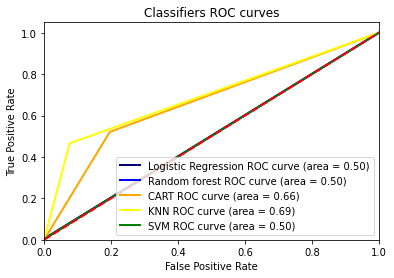

In [90]:
from sklearn.metrics import roc_curve, auc
y_pred_dt = modele_logit.predict(X_test)
y_pred_rf=Rfclf.predict(X_test)
#y_pred_naive=dtc.predict(X_test)
y_pred_knn=knn.predict(X_test)
y_pred_svm=svclassifier2.predict(X_test)
fpr1, tpr1, threshold1 = roc_curve(y_test, y_pred_dt) 
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, threshold2 = roc_curve(y_test, y_pred_rf) 
roc_auc2 = auc(fpr2, tpr2)
fpr3, tpr3, threshold3 = roc_curve(y_test, y_pred_dtc) 
roc_auc3 = auc(fpr3, tpr3)
fpr4, tpr4, threshold4 = roc_curve(y_test, y_pred_knn) 
roc_auc4 = auc(fpr4, tpr4)
fpr5, tpr5, threshold5 = roc_curve(y_test, y_pred_svm) 
roc_auc5 = auc(fpr5, tpr5)

plt.figure() 
plt.plot(fpr1, tpr1, color='navy', lw=2, label='Logistic Regression ROC curve (area = %0.2f)'% roc_auc1)
plt.plot(fpr2, tpr2, color='blue', lw=2, label='Random forest ROC curve (area = %0.2f)'% roc_auc2)
plt.plot(fpr3, tpr3, color='orange', lw=2, label='CART ROC curve (area = %0.2f)'% roc_auc3)
plt.plot(fpr4, tpr4, color='yellow', lw=2, label='KNN ROC curve (area = %0.2f)'% roc_auc4)
plt.plot(fpr5, tpr5, color='green', lw=2, label='SVM ROC curve (area = %0.2f)'% roc_auc5)


plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Classifiers ROC curves') 
plt.legend(loc = "lower right")
plt.show()